In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [4]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [5]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.isnull()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

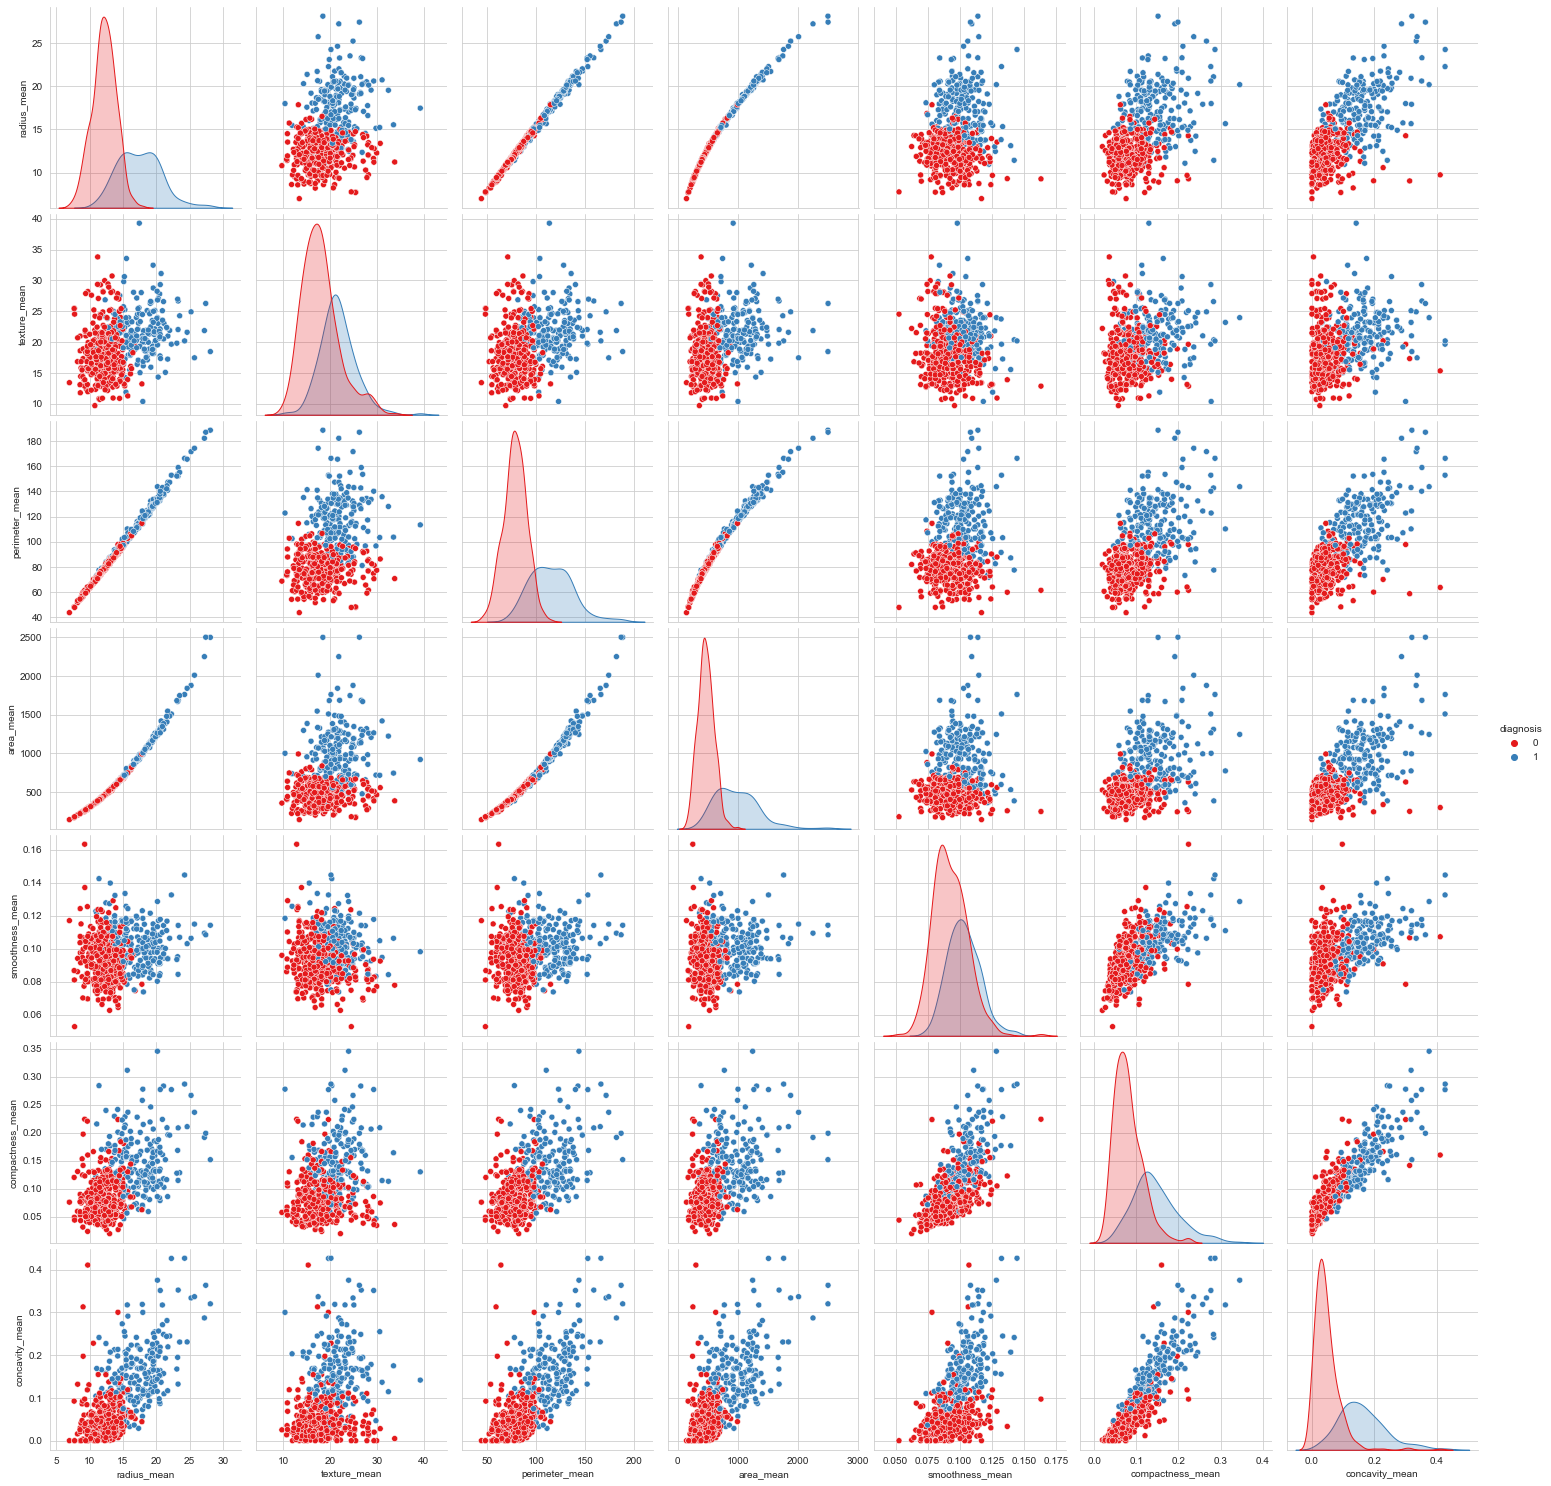

In [9]:
sns.set_style("whitegrid")
sns.pairplot(data[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","diagnosis"]],hue="diagnosis",height=3,palette="Set1")
plt.show()

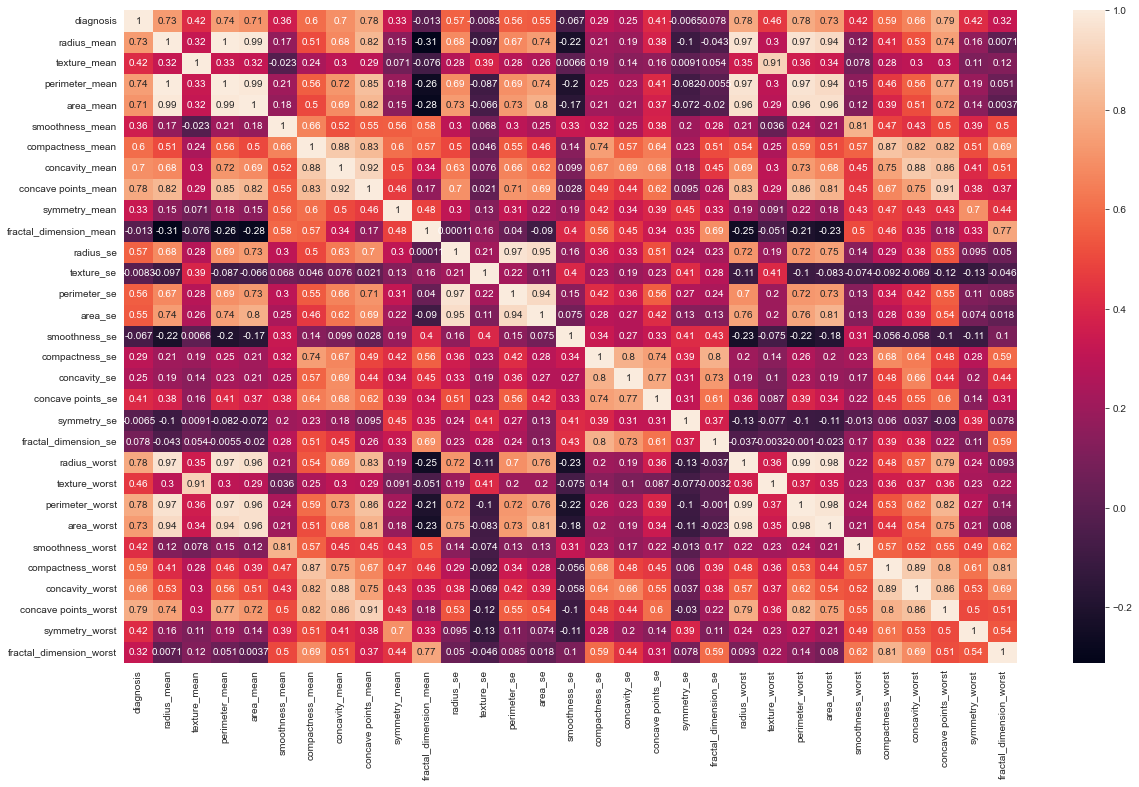

In [10]:
plt.figure(figsize = (20, 12))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [11]:
X = data.drop('diagnosis', axis = 1)
Y = data['diagnosis']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.25,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.fit_transform(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion="entropy")
rfc.fit(X_train,Y_train)
Y_pred=rfc.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)


[[253  19]
 [  8 147]]


In [15]:
print(rfc.score(X_train,Y_train))
print(rfc.score(X_test,Y_test))

1.0
0.936768149882904


In [16]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       272
           1       0.89      0.95      0.92       155

    accuracy                           0.94       427
   macro avg       0.93      0.94      0.93       427
weighted avg       0.94      0.94      0.94       427



In [17]:
# Support Vector Machine Algo 
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=0)
svc.fit(X_train,Y_train)
Y_pred1=svc.predict(X_test)
cm1=confusion_matrix(Y_test,Y_pred1)
print(cm1)


[[260  12]
 [  6 149]]


In [18]:
print(svc.score(X_train,Y_train))
print(svc.score(X_test,Y_test))

1.0
0.9578454332552693


In [19]:
print(classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       272
           1       0.93      0.96      0.94       155

    accuracy                           0.96       427
   macro avg       0.95      0.96      0.95       427
weighted avg       0.96      0.96      0.96       427



In [20]:
# Naive Bayes Algo
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
Y_pred2=gnb.predict(X_test)
cm2=confusion_matrix(Y_test,Y_pred2)
print(cm2)


[[249  23]
 [  8 147]]


In [21]:
print(gnb.score(X_train,Y_train))
print(gnb.score(X_test,Y_test))

0.9366197183098591
0.927400468384075


In [22]:
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       272
           1       0.86      0.95      0.90       155

    accuracy                           0.93       427
   macro avg       0.92      0.93      0.92       427
weighted avg       0.93      0.93      0.93       427



In [23]:
# K-NN Algo
from sklearn.neighbors import KNeighborsClassifier
kns=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
kns.fit(X_train,Y_train)
Y_pred3=kns.predict(X_test)
cm3=confusion_matrix(Y_test,Y_pred3)
print(cm3)


[[266   6]
 [ 14 141]]


In [24]:
print(kns.score(X_train,Y_train))
print(kns.score(X_test,Y_test))

0.9788732394366197
0.9531615925058547


In [25]:
print(classification_report(Y_test, Y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       272
           1       0.96      0.91      0.93       155

    accuracy                           0.95       427
   macro avg       0.95      0.94      0.95       427
weighted avg       0.95      0.95      0.95       427



In [26]:
# Logistic Regression Algo
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)
Y_pred4=lr.predict(X_test)
cm4=confusion_matrix(Y_test,Y_pred4)
print(cm4)


[[264   8]
 [  7 148]]


In [27]:
print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

1.0
0.9648711943793911


In [28]:
print(classification_report(Y_test, Y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       272
           1       0.95      0.95      0.95       155

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



In [29]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)
dtc.fit(X_train,Y_train)
Y_pred5=dtc.predict(X_test)
cm5=confusion_matrix(Y_test,Y_pred5)
print(cm5)


[[251  21]
 [ 17 138]]


In [30]:
print(dtc.score(X_train,Y_train))
print(dtc.score(X_test,Y_test))

0.9366197183098591
0.9110070257611241


In [34]:
print(classification_report(Y_test, Y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       272
           1       0.87      0.89      0.88       155

    accuracy                           0.91       427
   macro avg       0.90      0.91      0.90       427
weighted avg       0.91      0.91      0.91       427



In [32]:
df=pd.DataFrame({'Model':['Random Forest Classifier','Support Vector Machine','Naive Bayes','K-NN','Logistic Regression','Decision tree'],'Score':[rfc.score(X_test,Y_test),svc.score(X_test,Y_test),gnb.score(X_test,Y_test),kns.score(X_test,Y_test),lr.score(X_test,Y_test),dtc.score(X_test,Y_test)]})
df.sort_values(by=['Score'], ascending=False)

,Model,Score
4,Logistic Regression,0.964871
1,Support Vector Machine,0.957845
3,K-NN,0.953162
0,Random Forest Classifier,0.936768
2,Naive Bayes,0.927400
5,Decision tree,0.911007
